# Procedure
1. Import libraries
2. Define differential equation
3. Find matrix of slopes for each point in provided window
4. Graph line segment for each of these slopes

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline
def plot_slope_field(differential, xmin, xmax, ymin, ymax):
    """
    differential = function taking in x and y, returning slope as float
    xmin = x min value for window
    xmax = x max value for window
    ymin = y min value for window
    ymax = y max value for window
    """
    fig = plt.figure()
    axes = fig.add_axes([0,0,1,1])
    axes.set_xlim(xmin-0.3, xmax+0.3)
    axes.set_ylim(ymin-0.3, ymax+0.3)

    for x in range(xmin, xmax+1):
        for y in range(ymin, ymax+1):
            slope = differential(x, y)
            segment = lambda inp: y + slope*(inp-x)
            if slope==0:
                b = 0.2
            else:
                b = 0.1 / (abs(slope) ** 0.5)
            out_section = segment(np.array([x-b, x+b]))
            axes.plot(np.array([x-b, x+b]), out_section)

    axes.set_aspect('equal')
    axes.grid(True, which='both')

    # set the x-spine (see below for more info on `set_position`)
    axes.spines['left'].set_position('zero')

    # turn off the right spine/ticks
    axes.spines['right'].set_color('none')
    axes.yaxis.tick_left()

    # set the y-spine
    axes.spines['bottom'].set_position('zero')

    # turn off the top spine/ticks
    axes.spines['top'].set_color('none')
    axes.xaxis.tick_bottom()

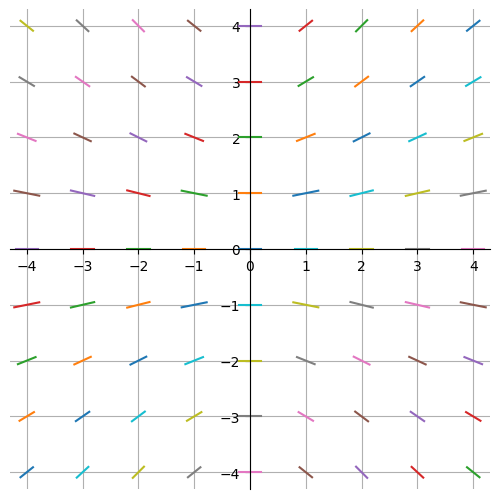

In [3]:
diff = lambda x,y: (x*y) / (x**2 + 4)
plot_slope_field(diff, -4, 4, -4, 4)